In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
import warnings
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
conn = sqlite3.connect('inventory.db')

In [3]:
df = pd.read_sql_query('select * from vendor_sales_summary',conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SaletoPuchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


<function matplotlib.pyplot.show(close=None, block=None)>

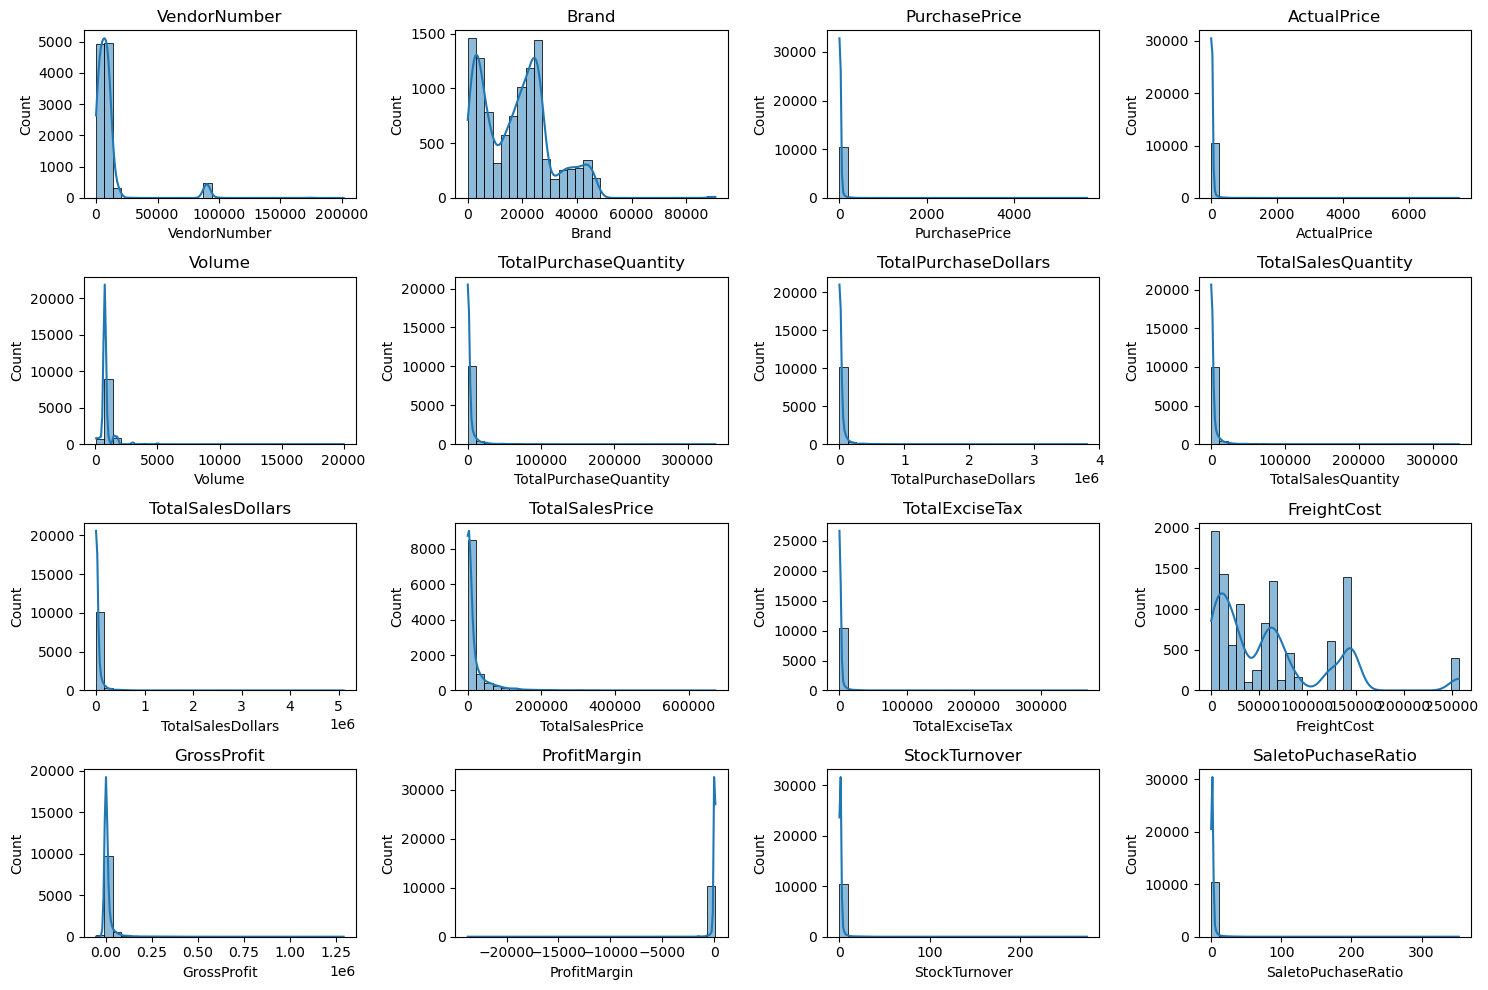

In [5]:
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde = True,bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

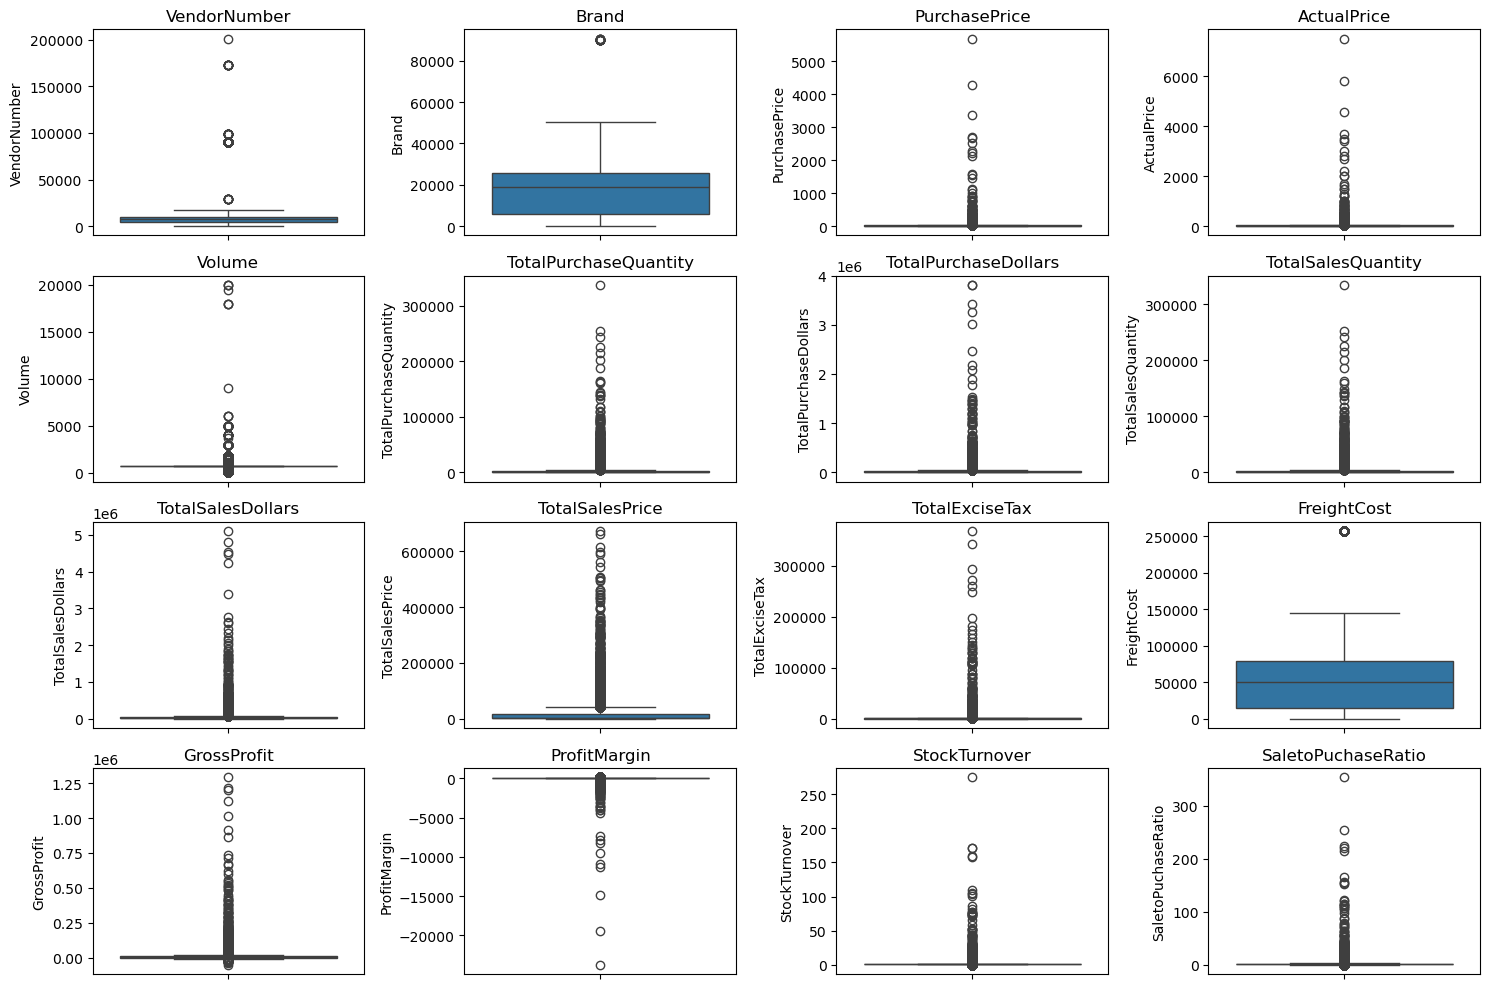

In [6]:
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show

In [7]:
df = pd.read_sql_query('SELECT * FROM vendor_sales_summary where GrossProfit > 0 and ProfitMargin > 0 and TotalSalesQuantity > 0',conn)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,8564.0,10107.074965,17635.714818,2.000000,3664.000000,7153.000000,9552.000000,2.013590e+05
Brand,8564.0,17614.670131,12946.130933,58.000000,5375.750000,17606.000000,24935.250000,9.063100e+04
PurchasePrice,8564.0,21.780897,81.189624,0.360000,6.660000,10.060000,17.850000,3.352930e+03
ActualPrice,8564.0,32.297467,112.420744,0.490000,9.990000,14.990000,25.990000,4.559990e+03
Volume,8564.0,864.332263,724.240079,50.000000,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,8564.0,3772.008991,12276.960631,1.000000,42.000000,431.000000,2666.750000,3.376600e+05
TotalPurchaseDollars,8564.0,35887.253324,136722.999153,0.710000,546.187500,5018.400000,26610.177500,3.811252e+06
TotalSalesQuantity,8564.0,3748.983419,12125.696083,1.000000,62.000000,490.500000,2675.000000,3.349390e+05
TotalSalesDollars,8564.0,51542.278077,186071.489729,1.980000,1355.580000,8483.780000,40622.112500,5.101920e+06
TotalSalesPrice,8564.0,22759.270732,49305.274018,0.990000,584.790000,4549.755000,22595.252500,6.728193e+05


<function matplotlib.pyplot.show(close=None, block=None)>

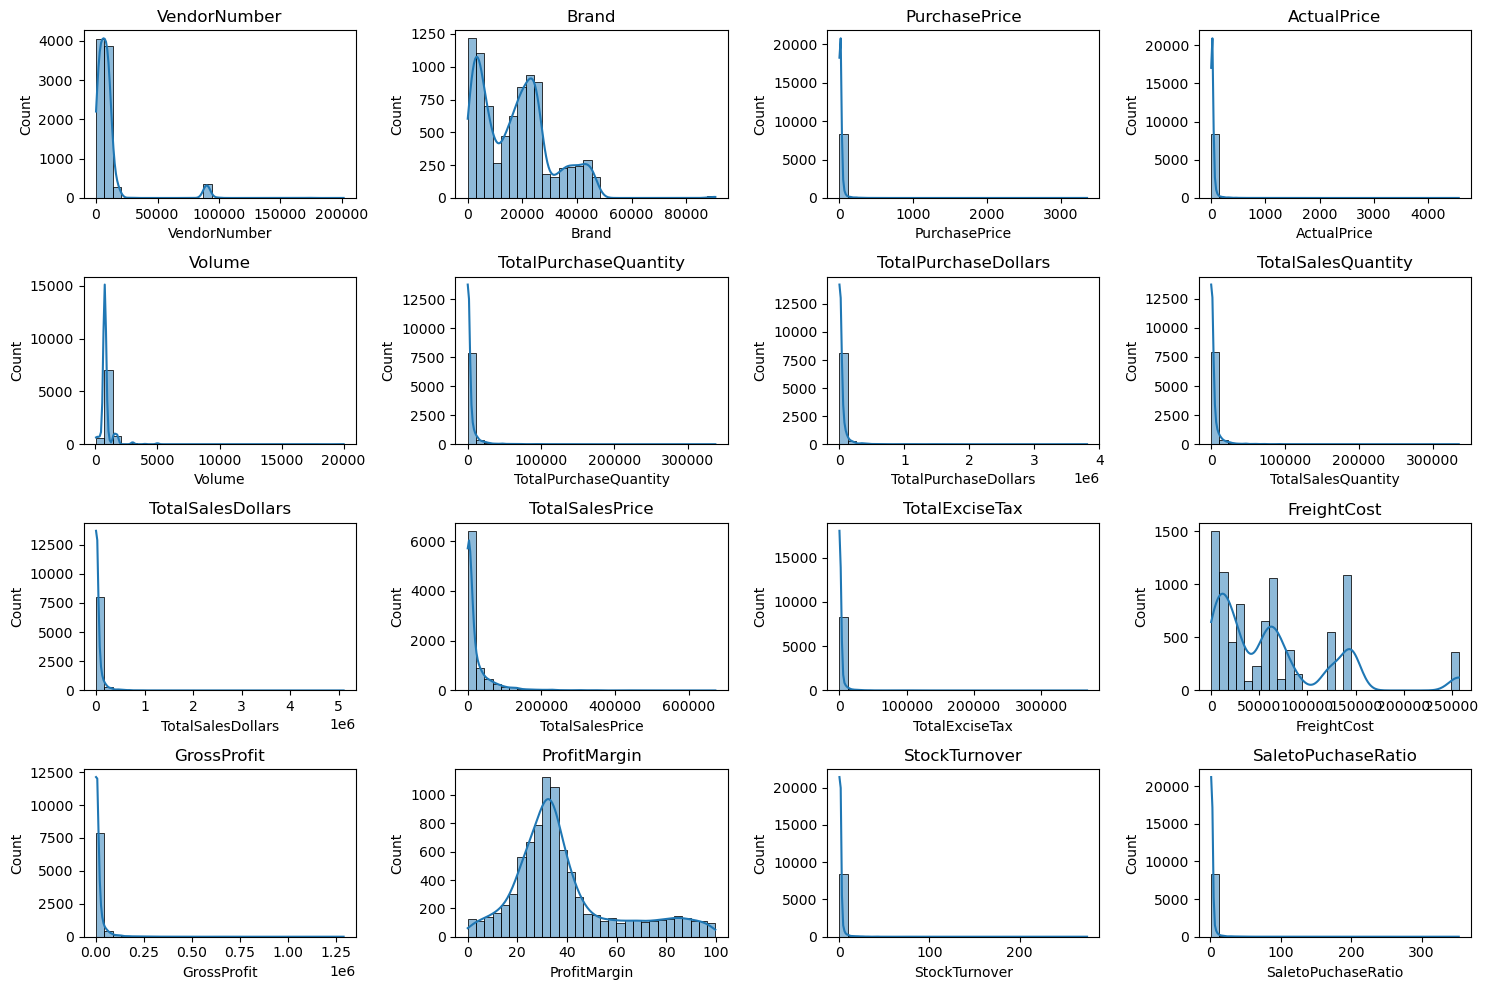

In [9]:

numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde = True,bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show

In [10]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SaletoPuchaseRatio'],
      dtype='object')

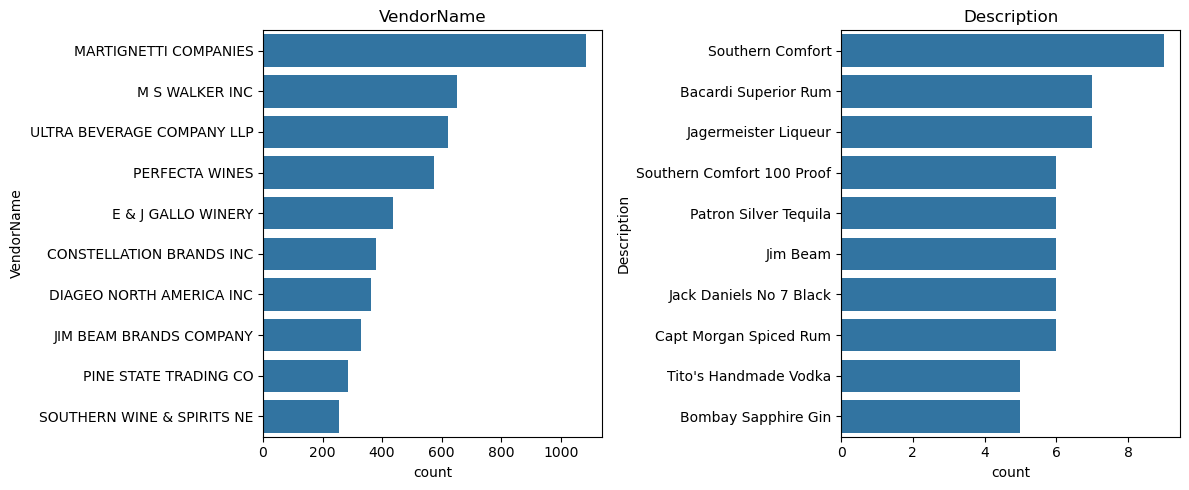

In [11]:
categorical_columns = ['VendorName','Description']
plt.figure(figsize = (12,5))
for i,col in enumerate(categorical_columns):
    plt.subplot(1,2,i+1)
    sns.countplot(y = df[col], order = df[col].value_counts().index[:10])
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

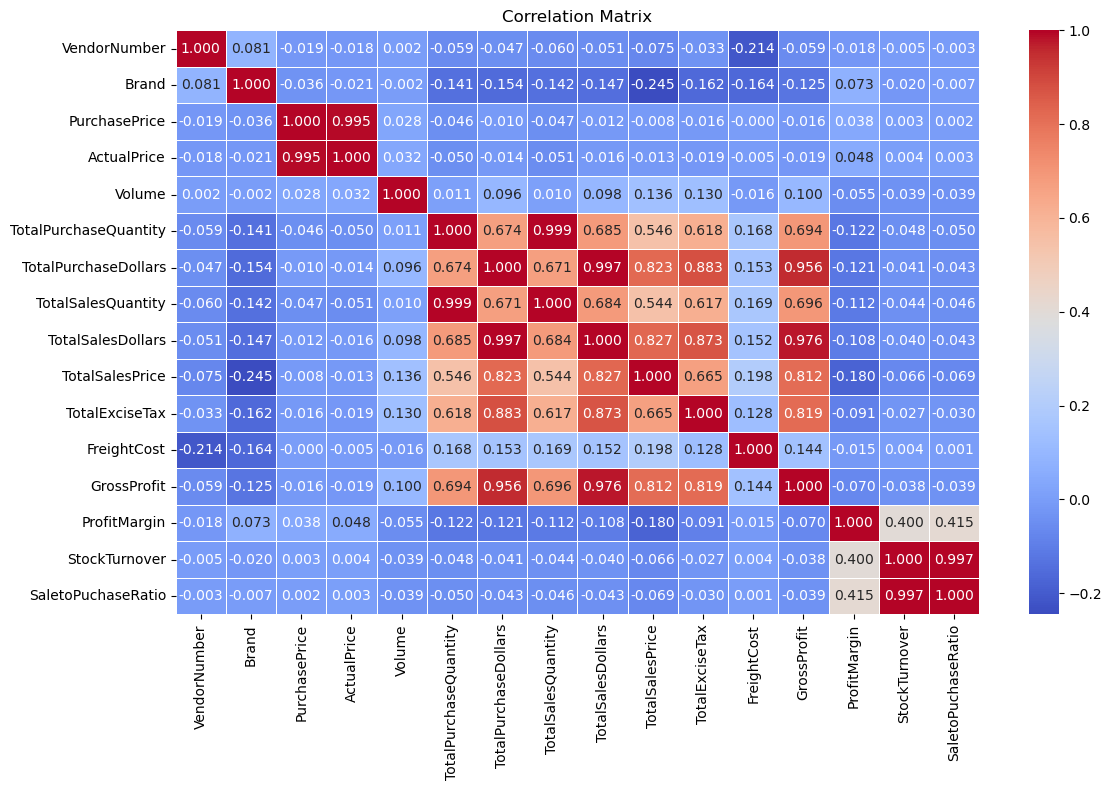

In [12]:
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot = True,cmap = "coolwarm",linewidth = 0.5,fmt = '.3f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Correlation Insights

- Purchase Price doesnot significantly impact sales revenue or profit
- Profit Margin & Total sales price have negative correlation, suggests that as sales price increases, margin decreases
- Stock Turnover has negative correlation with Gross Profit and Profit Margin means that faster turnover dosnot means higher profitability

# Data Analysis
- Identify Brands that needs promotional or pricing adjustment which exhibit lower sales performance but higher profit margins


In [13]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [14]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

target_brands = brand_performance[
(brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
(brand_performance['ProfitMargin'] >= high_margin_threshold)
]

print('Brands with low sales but high profit margin')
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margin


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [15]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000]

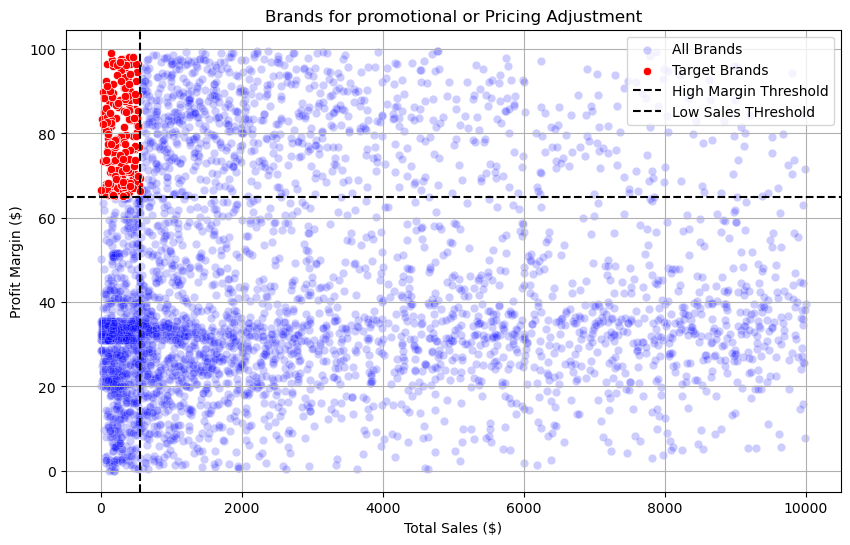

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = brand_performance, x= 'TotalSalesDollars',y='ProfitMargin',color = 'blue',label = 'All Brands', alpha = 0.2)
sns.scatterplot(data = target_brands,x='TotalSalesDollars',y='ProfitMargin',color = 'red',label = 'Target Brands')

plt.axhline(high_margin_threshold, linestyle ='--',color = 'black',label='High Margin Threshold')
plt.axvline(low_sales_threshold,linestyle='--',color='black',label='Low Sales THreshold')

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin ($)')
plt.title('Brands for promotional or Pricing Adjustment')
plt.legend()
plt.grid(True)
plt.show()

- Which vendor and brands demonstrates the highest sales performance

In [17]:
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)


In [18]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [19]:
top_vendors.apply(lambda x : format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

In [20]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

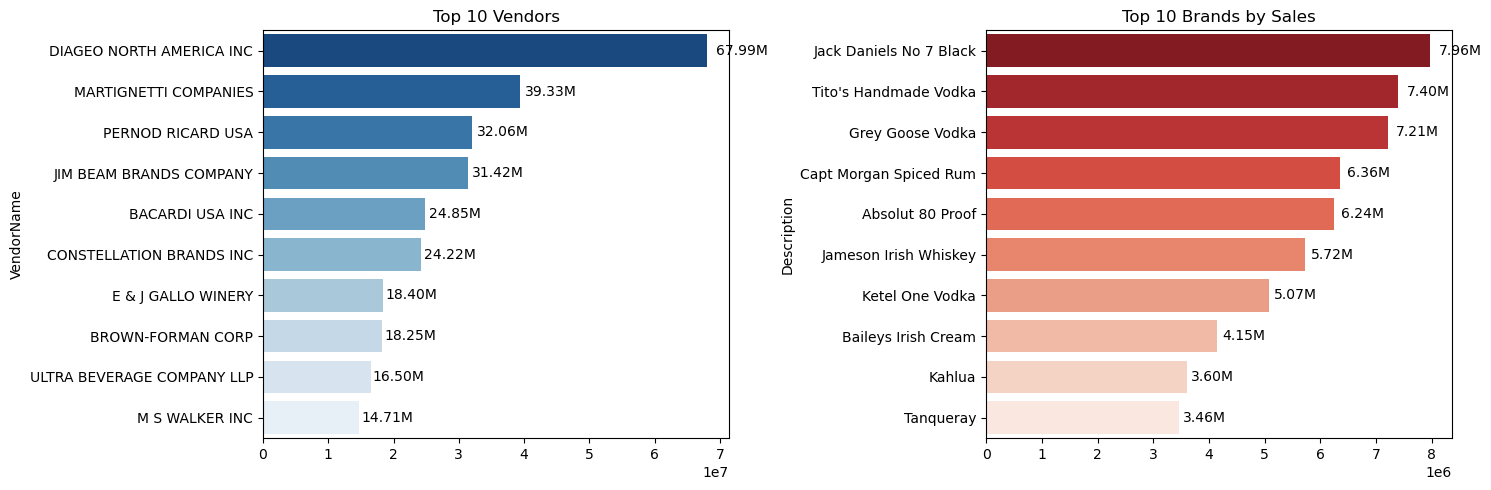

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendors.index,x= top_vendors.values,palette = 'Blues_r')
plt.title('Top 10 Vendors')

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
    bar.get_y() + bar.get_height() / 2,
    format_dollars(bar.get_width()),
    ha = 'left', va = 'center', fontsize =10, color = 'black')

plt.subplot(1,2,2)
ax1 = sns.barplot(y=top_brands.index,x= top_brands.values,palette = 'Reds_r')
plt.title('Top 10 Brands by Sales')

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
    bar.get_y() + bar.get_height() / 2,
    format_dollars(bar.get_width()),
    ha = 'left', va = 'center', fontsize =10, color = 'black')

plt.tight_layout()
plt.show()

- Impact of bulk purchases on unit price

In [22]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SaletoPuchaseRatio'],
      dtype='object')

In [23]:
df['UnitPrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [24]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SaletoPuchaseRatio,UnitPrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89


In [25]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'],q=3,labels=['Small','Medium','Large'])

In [26]:
df.groupby('OrderSize')[['UnitPrice']].mean()

,UnitPrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


Vendors buying in large order size tends to have low unit price and vice versa
This suggests that successful price bulking strategies encourages vendors to buy in large quantity leading to overall high sales
revenue despite lower per unit revenue

- Assess Inventory turnover to reduce holding costs and improve effeciency 

In [27]:
# Vendors with < 1 Stock Turnover
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending = True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [28]:
# Calculating Unsold Inventory per vendor

df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Total Unsold Capital: ',format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital:  2.71M


In [29]:
# Determining top vendors in this category

inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by = 'UnsoldInventoryValue',ascending = False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


- Profitibality Variance between Top perfroming and Low performing Vendors

In [30]:
# Creating threshold

top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)


In [31]:
# Identifying Top and Low Perfroming Vendors

top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

In [32]:
top_vendors.head()

0    25.297693
1    21.062810
2    24.675786
3    27.139908
4    28.412764
Name: ProfitMargin, dtype: float64

In [33]:
def confidence_interval(data,confidence = 0.95):
    mean_val = np.mean(data)
    std_err = np.std(data,ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1+confidence) / 2, df = len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val,mean_val - margin_of_error,mean_val + margin_of_error

Top Vendors 95% CI: (30.74,  31.61), Mean:  31.18
Low Vendors 95% CI: (40.50,  42.64), Mean:  41.57


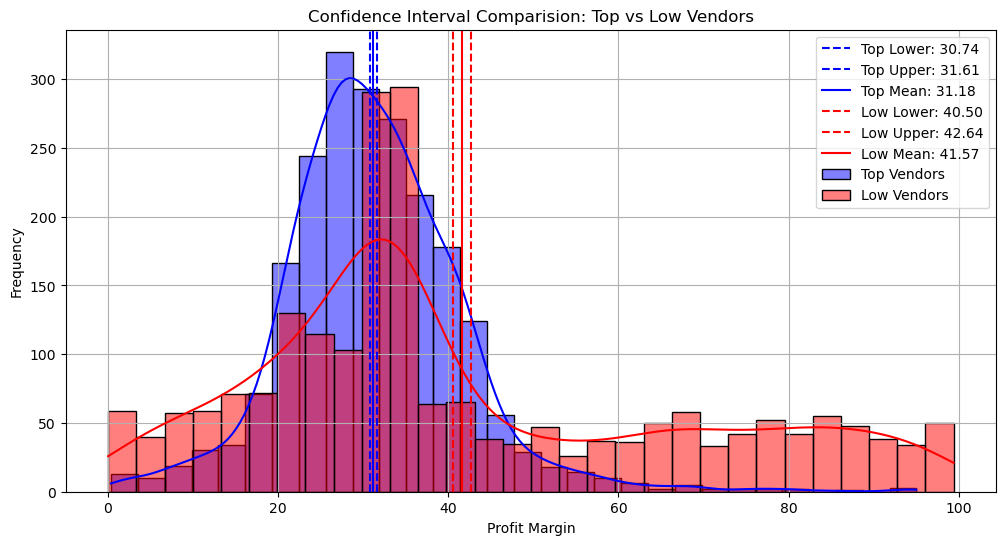

In [34]:
top_mean,top_lower,top_upper = confidence_interval((top_vendors))
low_mean,low_lower,low_upper = confidence_interval((low_vendors))

print(f'Top Vendors 95% CI: ({top_lower:.2f}, {top_upper: .2f}), Mean: {top_mean: .2f}')
print(f'Low Vendors 95% CI: ({low_lower:.2f}, {low_upper: .2f}), Mean: {low_mean: .2f}')

plt.figure(figsize = (12,6))

# Top Vendors Plot
sns.histplot(top_vendors, kde = True, color = 'blue', bins=30,alpha=0.5,label='Top Vendors')
plt.axvline(top_lower,color='blue',linestyle='--',label=f'Top Lower: {top_lower:.2f}')
plt.axvline(top_upper,color='blue',linestyle='--',label=f'Top Upper: {top_upper:.2f}')
plt.axvline(top_mean,color='blue',linestyle='-',label=f'Top Mean: {top_mean:.2f}')


# Low Vendors Plot
sns.histplot(low_vendors, kde = True, color = 'red', bins=30,alpha=0.5,label='Low Vendors')
plt.axvline(low_lower,color='red',linestyle='--',label=f'Low Lower: {low_lower:.2f}')
plt.axvline(low_upper,color='red',linestyle='--',label=f'Low Upper: {low_upper:.2f}')
plt.axvline(low_mean,color='red',linestyle='-',label=f'Low Mean: {low_mean:.2f}')

#Finalizing Plot
plt.title('Confidence Interval Comparision: Top vs Low Vendors')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

The CI for low vendors are significantly higher than top vendors indicating that they 
have more profit margin than top vendors. 
This may be because of premium pricing or lower operational cost

# Is there a significant difference in profit margins between top-perfroming and low-performing vendors

Ho (Null Hypothesis): These is no significant difference in the mean profit margins of top-performing and low-performing vendors

H1 (Alternative Hypothesis): THe mean profit margins of top-performing and low-performing vendors are significantly different

In [35]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

#Perform Two-Sample T-Test
t_stat,p_value = ttest_ind(top_vendors, low_vendors, equal_var = False)

#Printing Result
print(f'T-Statistics: {t_stat:.4f},P-Value: {p_value:.4f}')
if p_value < 0.05:
    print("Reject Ho: There is  significant difference in profit margin betwenn top and low perfroming vendors")
else:
    print("Fail to reject Ho: No significant difference in profit margin betwenn top and low perfroming vendors")
    

T-Statistics: -17.6695,P-Value: 0.0000
Reject Ho: There is  significant difference in profit margin betwenn top and low perfroming vendors


In [39]:
df.to_excel('Vendor_Sales_Summary.xlsx',index=False)